### N01: Data Creation, Exploration & Cleaning

The purpose of this notebook is to:<br>
1. Create a fake/artificial dataset
2. Explore the data
3. Clean and prepare the data for further analysis

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from faker import Faker
from datetime import datetime

###
## PART 1: Creating Fake / Artificial Data

In [2]:
# determining size of the dataset

num_rows = 10000

In [3]:
# random choice of the country to work on

locales = ['en_GB', 'tr_TR', 'no_NO', 'de_DE', 'pl_PL', 'da_DK', 'fr_FR', 'ro_RO', 'gr_GR', 'pt_PT']
ran_loc = random.choice(locales)

In [4]:
# applying 'faker' library 

fake = Faker(ran_loc)

#### Creating Cities

In [5]:
city_set = []
for i in range(30):
    city = fake.city()
    city_set.append(city)

#### Creating Categories

In [6]:
category_set = []
for i in range (0, num_rows):
    category = fake.random_element(elements=("Apartment", "Private Room", "Studio", "Shared Room"))
    category_set .append(category)

#### Creating Prices

In [7]:
def prices(x, y, z):
    price_set = []
    for i in range(x):
        price = fake.pyfloat(left_digits=None, right_digits=2, positive=0, min_value=y, max_value=z)
        price_set.append(price)

    return price_set

In [8]:
price_set_10 = prices(500, 0, 10)
price_set_100 = prices(2000, 10, 100)
price_set_1000 = prices(4000, 100, 1000)
price_set_10000 = prices(3000, 1000, 10000)
price_set_100000 = prices(501, 10000, 100000)

In [9]:
price_set = price_set_10 + price_set_100 + price_set_1000 + price_set_10000 + price_set_100000

#### Creating Sizes

In [10]:
def sizes(x, y, z):
    size_set = []
    for i in range(x):
        size = fake.random_int(min=y, max=z)
        size_set.append(size)

    return size_set

In [11]:
size_set_0 = sizes(300, 0, 1)
size_set_10 = sizes(300, 2, 10)
size_set_100 = sizes(3700, 10, 100)
size_set_1000 = sizes(2800, 100, 1000)
size_set_10000 = sizes(300, 1000, 10000)

In [12]:
size_set_num = size_set_0 + size_set_10 + size_set_100 + size_set_1000 + size_set_10000

In [13]:
size_set_str = list(map(str, size_set_num))

In [14]:
# adding blanks

size_set_null = ["null"] * 700
size_set_empty = [""] * 301

In [15]:
size_set = size_set_str + size_set_null + size_set_empty

#### Creating Dates

In [16]:
date_set = []
for i in range(num_rows):
    date_time = fake.date_time_between_dates(
        datetime_start=datetime(2013, 1, 1, 0, 0, 0),
        datetime_end=datetime(2017, 12, 31, 23, 59, 59)
    ).replace(microsecond=0)
    date_set.append(date_time)

#### Creating Additional Values

In [17]:
add_set_1 = []
for i in range (0, num_rows):
    add_1 = fake.random_element(elements=("", "yes", "no"))
    add_set_1.append(add_1)

In [18]:
add_set_2 = []
for i in range (0, num_rows):
    add_2 = fake.random_element(elements=("", "no", "private", "shared"))
    add_set_2.append(add_2)

#### Populating and modifying dataset

In [19]:
def pad_list(lst, num_rows):
    return lst + [None] * (num_rows - len(lst))

In [20]:
city = [
    random.choice(city_set) if random.random() < 0.952 else None
    for _ in range(num_rows)
]

category = [
    random.choice(category_set) if random.random() < 0.950 else None
    for _ in range(num_rows)
]

country_code = ran_loc[:2]

created_at = [
    random.choice(date_set)
    for _ in range(num_rows)
]

price = [
    random.choice(price_set)
    for _ in range(num_rows)
]

total_size = [
    random.choice(size_set) if random.random() < 0.81 else None
    for _ in range(num_rows)
]

furnished = [
    random.choice(add_set_1) if random.random() < 0.954 else None
    for _ in range(num_rows)
]

registration_possible = [
    random.choice(add_set_1) if random.random() < 0.8 else None
    for _ in range(num_rows)
]

washing_machine = [
    random.choice(add_set_1) if random.random() < 0.947 else None
    for _ in range(num_rows)
]

tv = [
    random.choice(add_set_1) if random.random() < 0.951 else None
    for _ in range(num_rows)
]

balcony = [
    random.choice(add_set_1) if random.random() < 0.4 else None
    for _ in range(num_rows)
]

garden = [
    random.choice(add_set_1) if random.random() < 0.938 else None
    for _ in range(num_rows)
]

terrace = [
    random.choice(add_set_1) if random.random() < 0.39 else None
    for _ in range(num_rows)
]

In [21]:
data = {
        "city": city,
        "category": category,
        "country_code": country_code,
        "created_at": created_at,
        "price": price,
        "total_size": total_size,
        "furnished": furnished,
        "registration_possible": registration_possible,
        "washing_machine": washing_machine,
        "tv": tv,
        "balcony": balcony,
        "garden": garden,
        "terrace": terrace
}

In [22]:
df = pd.DataFrame(data)

In [23]:
columns_to_format = [
    "total_size",
    "furnished", 
    "registration_possible", 
    "washing_machine", 
    "tv", 
    "balcony", 
    "garden", 
    "terrace"
]

for col in columns_to_format:
    if df[col] is not None:
        df[col] = '"' + df[col] + '"'

In [24]:
df = df.fillna(value=np.nan)

###
## PART 2: Exploration

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Analyzing Acquired Data</p>

In [25]:
# General Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   9529 non-null   object        
 1   category               9508 non-null   object        
 2   country_code           10000 non-null  object        
 3   created_at             10000 non-null  datetime64[ns]
 4   price                  10000 non-null  float64       
 5   total_size             8140 non-null   object        
 6   furnished              9513 non-null   object        
 7   registration_possible  8026 non-null   object        
 8   washing_machine        9465 non-null   object        
 9   tv                     9516 non-null   object        
 10  balcony                3955 non-null   object        
 11  garden                 9397 non-null   object        
 12  terrace                3943 non-null   object        
dtypes:

In [26]:
# Number of Missing Values

df.isnull().sum()

city                      471
category                  492
country_code                0
created_at                  0
price                       0
total_size               1860
furnished                 487
registration_possible    1974
washing_machine           535
tv                        484
balcony                  6045
garden                    603
terrace                  6057
dtype: int64

In [27]:
# Random Sample

df.sample(10)

,city,category,country_code,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
5482,Hansgrunn,Studio,no,2015-05-20 09:54:40,7244.00,"""71""","""""","""no""","""yes""","""""","""yes""","""yes""",NaN
3167,Haugland,Shared Room,no,2014-08-11 08:33:22,289.37,"""null""","""no""","""yes""",NaN,"""yes""","""yes""","""yes""","""no"""
8916,Kjerstines,Private Room,no,2013-12-20 16:02:11,969.68,NaN,NaN,"""yes""","""yes""","""""","""yes""","""""",""""""
2924,Karlsen,Private Room,no,2014-08-24 22:00:03,5197.44,"""13""","""no""",NaN,"""no""","""yes""","""yes""","""no""",NaN
3142,Stigstrøm,Studio,no,2014-05-27 12:38:24,766.77,NaN,"""""","""no""","""""","""no""","""yes""","""""",NaN
2648,Hansgrunn,Apartment,no,2013-11-10 21:17:26,9911.19,"""null""","""""",NaN,"""yes""","""no""","""""","""yes""",NaN
9711,Stineøy,Private Room,no,2013-01-17 18:00:45,38.90,"""44""","""yes""","""no""","""""","""yes""",NaN,"""yes""","""yes"""
9496,Haugland,Shared Room,no,2017-02-15 14:24:17,4050.29,"""612""","""no""","""""","""""","""yes""",NaN,"""no""",NaN
6131,Andresen,Apartment,no,2015-04-01 15:49:37,181.92,"""487""","""yes""",NaN,"""no""","""no""",NaN,"""no""",NaN
1233,Gulbrandsen,Studio,no,2016-12-16 15:32:47,91.83,"""398""","""yes""",NaN,"""yes""","""yes""","""no""","""no""",NaN


In [28]:
# Looping Through Columns to Inspect Data Types and Values

for col in df.columns:
    print(f"\n--------------------------\n'value_counts' for column: ")
    print(df[col].value_counts(dropna=False))


--------------------------
'value_counts' for column: 
city
Haugen         687
Haugland       644
NaN            471
Berntsen       353
Tangen         349
Stineøy        347
Bjørnodden     340
Egilmark       338
Monicanes      337
Hansgrunn      330
Stigstrøm      325
Jannefjell     323
Kjerstines     319
Gulbrandsen    318
Martinvær      318
Andresen       316
Oddbø          315
Sindreeid      310
Karineid       306
Vik            305
Pedersen       303
Karlsen        302
Markushelle    302
Lie            301
Siriodden      297
Cecilieby      290
Jensen         289
Maritås        287
Marihelle      278
Name: count, dtype: int64

--------------------------
'value_counts' for column: 
category
Studio          2434
Apartment       2399
Private Room    2345
Shared Room     2330
NaN              492
Name: count, dtype: int64

--------------------------
'value_counts' for column: 
country_code
no    10000
Name: count, dtype: int64

--------------------------
'value_counts' for column: 
cre

####
#### Summary:

The acquired dataset contained a significant number of inconsistencies across multiple dimensions:

- Data types were poorly structured, with most columns stored as object, regardless of whether they contained text, numeric values, or booleans.
- Text fields were inconsistently formatted, appearing either as plain strings or enclosed in quotation marks.
- Numerical columns such as total_size were also stored as strings.
- Missing values were prevalent across several key columns, appearing as NaN or whitespace (" ").
- The total_size and price fields included outliers and logically invalid values (e.g. 1 m² private rooms or 10 000 m² shared rooms).
- The dataset lacked enforced standardization, requiring manual data type conversions, normalization of string fields, and detailed handling of null or corrupted entries.

To prepare the data for analysis, extensive cleaning was necessary, including type conversions, deduplication, normalization of text fields, imputation strategies, and outlier handling.

###
## PART 3: Data Cleaning And Preparing For Further Analysis

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Dropping Unnecessary Columns</p>

In [29]:
df = df.drop('country_code', axis=1)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Removing Duplicates</p>

In [30]:
# Checking for Duplicates

veryfication_columns = ['created_at', 'city', 'price', 'category', 'total_size']

n_dupes = df.duplicated(subset=veryfication_columns, keep='first').sum()
print(f"There are {n_dupes} duplicated rows.")

There are 0 duplicated rows.


In [31]:
# Dropping Duplicates

df = df.drop_duplicates(subset=veryfication_columns, keep='first')

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Changing Data Types</p>

In [32]:
# Removing Empty Strings and Whitespace from Data

for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip('"')

In [33]:
# Changing Data Type to String

strings_to_change = ['city', 'category', 'balcony', 'garden', 'terrace']
df[strings_to_change] = df[strings_to_change].astype("string")

In [34]:
# Changing Data Type to Boolean

bool_to_change = ['furnished', 'registration_possible', 'washing_machine', 'tv']
bool_map = {'yes': True, 'no': False}

for col in bool_to_change:
    df[col] = df[col].str.lower().map(bool_map)
    
df[bool_to_change] = df[bool_to_change].astype("boolean")

In [35]:
# Changing Data Type to Integer

df['total_size'] = (
    df['total_size']
    .astype(str)
    .replace('nan', np.nan)                       
    .replace(r'^\s*$', np.nan, regex=True)
)

df['total_size'] = pd.to_numeric(df['total_size'], errors='coerce')
df['total_size'] = df['total_size'].astype('Int64')

In [36]:
# Converting to Date Format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

In [37]:
# Verifying Changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   10000 non-null  string        
 1   category               10000 non-null  string        
 2   created_at             10000 non-null  datetime64[ns]
 3   price                  10000 non-null  float64       
 4   total_size             7169 non-null   Int64         
 5   furnished              6427 non-null   boolean       
 6   registration_possible  5325 non-null   boolean       
 7   washing_machine        6391 non-null   boolean       
 8   tv                     6285 non-null   boolean       
 9   balcony                10000 non-null  string        
 10  garden                 10000 non-null  string        
 11  terrace                10000 non-null  string        
dtypes: Int64(1), boolean(4), datetime64[ns](1), float64(1), strin

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Unifying Missing Values</p>

In [38]:
# Replacing All Nulls and Empty Strings with <NA>

common_nulls = ["nan", "nat", "none", "null", "n/a", "missing"]

for col in df.select_dtypes(include='string'):
    df[col] = (
        df[col]
        .replace(common_nulls, pd.NA)                
        .replace(r'^\s*$', pd.NA, regex=True)      
    )

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Removing Non-Usable Entries</p>

Rows lacking both city (and subsequently category) were dropped because they cannot contribute to geographic or categorical analyses. Price was imputed only when both city and category were present, using the city‑category median, which preserves data volume without distorting local price distributions.

In [39]:
n_before = len(df)

# Dropping Rows with Missing City Information
df = df.dropna(subset=['city'])

# Filling Missing Category Values
df['category'] = df['category'].fillna('unknown')

# Imputing Missing Prices Using City–Category Median
price_median = (
    df.groupby(['city','category'])['price']
      .median()
      .rename('city_cat_median')
)

df = df.join(price_median, on=['city','category'])
df['price'] = df['price'].fillna(df['city_cat_median'])
df = df.drop(columns='city_cat_median')

n_after = len(df)
print(f"Removed {n_before - n_after} rows.")

Removed 471 rows.


<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Prices Veryfication</p>

In [40]:
print("Min price:", df['price'].min())
print("Max price:", df['price'].max())

Min price: 0.18
Max price: 99801.47


In [41]:
# Higher than €10000

df[df['price'] > 10000].sort_values(by='price', ascending=False)

,city,category,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
4730,Haugland,Private Room,2015-12-25 19:16:13,99801.47,26,False,<NA>,<NA>,False,yes,yes,<NA>
7797,Haugen,unknown,2014-02-16 14:31:02,99801.47,<NA>,False,False,True,True,no,<NA>,no
3003,Kjerstines,Shared Room,2015-12-25 19:16:13,99801.47,<NA>,True,<NA>,<NA>,True,<NA>,yes,<NA>
9108,Sindreeid,Studio,2013-08-13 14:39:17,99801.47,94,<NA>,<NA>,True,True,<NA>,yes,yes
7367,Sindreeid,Private Room,2013-01-17 23:46:36,99731.70,91,<NA>,<NA>,<NA>,True,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,Markushelle,Studio,2014-05-27 10:18:12,10457.82,8017,False,False,False,False,<NA>,yes,<NA>
4325,Haugen,Shared Room,2016-06-14 05:13:26,10457.82,<NA>,True,True,False,True,<NA>,<NA>,no
7890,Gulbrandsen,Apartment,2014-01-27 15:04:19,10367.13,81,True,True,<NA>,False,<NA>,<NA>,<NA>
2626,Haugland,Apartment,2015-01-19 03:46:33,10367.13,27,True,True,<NA>,True,<NA>,<NA>,<NA>


In [42]:
# Lower than €50

df[df['price'] < 80].sort_values(by='price', ascending=False)

,city,category,created_at,price,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
4412,Siriodden,Private Room,2016-08-26 20:13:51,79.91,41,True,<NA>,True,<NA>,<NA>,no,yes
1536,Stineøy,Apartment,2017-01-16 12:11:00,79.91,13,True,<NA>,<NA>,False,<NA>,no,<NA>
8513,Jannefjell,Shared Room,2014-07-02 12:02:23,79.83,125,True,<NA>,<NA>,True,<NA>,<NA>,no
6521,Oddbø,Studio,2017-03-01 19:40:08,79.80,260,True,False,False,<NA>,<NA>,yes,<NA>
1019,Tangen,Private Room,2013-04-04 17:38:22,79.77,<NA>,True,True,False,False,<NA>,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,Haugland,Shared Room,2014-01-05 22:42:07,0.24,<NA>,<NA>,False,False,True,<NA>,yes,no
691,Pedersen,Shared Room,2014-08-29 11:32:53,0.20,<NA>,False,False,False,<NA>,yes,no,no
2645,Marihelle,Apartment,2013-02-07 10:21:22,0.18,733,<NA>,<NA>,True,True,<NA>,<NA>,<NA>
4260,Jensen,Apartment,2016-06-01 19:30:46,0.18,<NA>,False,True,True,True,<NA>,yes,<NA>


In [43]:
# Dropping Rows with Unrealistic Prices

df = df.drop(df[df['price'] > 12000].index)
df = df.drop(df[df['price'] < 100].index)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Imputing Data to Handle Inconsistencies in 'Category'</p>

In [44]:
# Gathering Values for Pre-Comparison

vc1 = df['category'].value_counts()
p1 = df.groupby('category')['price'].median()
s1 = df.groupby('category')['total_size'].median()

Since the price field is the most complete and reliable variable in the dataset, it is used to define threshold ranges that enable more accurate assignment of the category values.

In [45]:
def price_to_category(price):
    if price > 1000:
        return 'Luxury Apartment' # INTRODUCING NEW CATEGORY!
    if price > 500:
        return 'Apartment'
    if price > 400:
        return 'Studio'
    if price > 300:
        return 'Private Room'
    if price >= 200:
        return 'Shared Room'
    return 'Other'
    
df['category'] = df['price'].apply(price_to_category)

In [46]:
# Capturing Values for After-Comparison

vc2 = df['category'].value_counts()
p2 = df.groupby('category')['price'].median()
s2 = df.groupby('category')['total_size'].median()

In [47]:
# Comparing Value Counts Before and After Imputation

pd.concat([vc1, vc2], axis=1)

,count,count
category,,
Studio,1612,383.0
Apartment,1610,2127.0
Shared Room,1585,463.0
Private Room,1578,407.0
unknown,345,NaN
Luxury Apartment,<NA>,2901.0
Other,<NA>,449.0


In [48]:
# Comparing Median Price Before and After Imputation

pd.concat([p1, p2], axis=1)

,price,price
category,,
Apartment,917.650,765.70
Private Room,897.390,348.13
Shared Room,900.760,249.72
Studio,884.255,451.43
unknown,926.140,NaN
Luxury Apartment,NaN,5574.75
Other,NaN,151.60


In [49]:
# Comparing Median Total Size Before and After Imputation

pd.concat([s1, s2], axis=1)

,total_size,total_size
category,,
Apartment,89.0,88.5
Private Room,89.0,84.0
Shared Room,85.0,84.5
Studio,85.0,94.0
unknown,85.0,<NA>
Luxury Apartment,<NA>,86.0
Other,<NA>,93.0


After correcting the category values based on price thresholds, new inconsistencies in room sizes became apparent. These issues will be addressed in the next step.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Outlier Detection – Before</p>

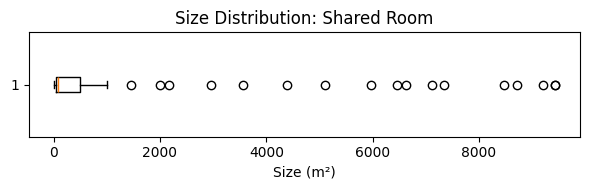

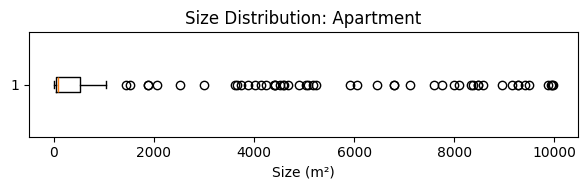

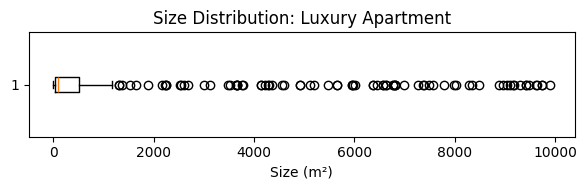

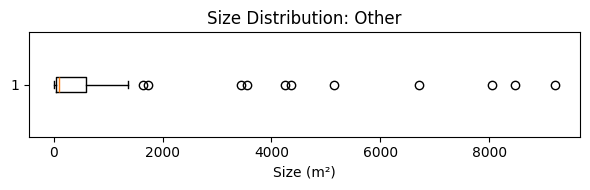

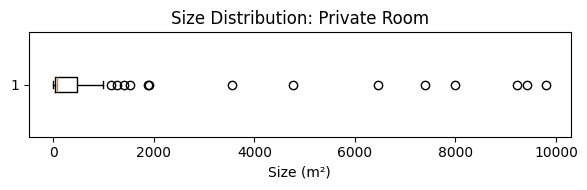

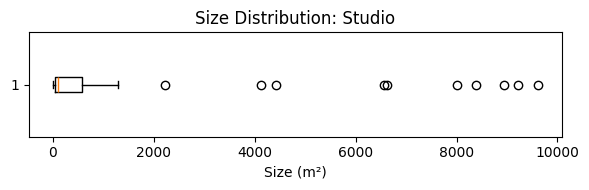

In [50]:
for cat in df['category'].unique():
    subset = df[df['category'] == cat]['total_size'].dropna()
    
    plt.figure(figsize=(6,2))
    plt.boxplot(subset, vert=False)
    plt.title(f"Size Distribution: {cat}")
    plt.xlabel("Size (m²)")
    plt.tight_layout()
    plt.show()

Since the 'total_size' data is highly inconsistent, and the medians cannot be considered reliable indicators (e.g., the median size for a private room is 100 m²), a set of plausible value thresholds was introduced to guide the cleaning process.

In [51]:
# Defining Plausible Maximum Sizes (in m²)
plausible_max = {
    'Shared Room':      15,
    'Private Room':     30,
    'Studio':           50,
    'Apartment':       200,
    'Luxury Apartment':200,
}

# Building the Mask and Replacing <NA> with False
mask = df.apply(
    lambda row: row['total_size'] > plausible_max.get(row['category'], float('inf')),
    axis=1
).fillna(False)

print(f"Flagging {mask.sum()} listings as too large for their category")

# Clearing Out Invalid Size Values
df.loc[mask, 'total_size'] = pd.NA

# Recomputing Medians by Original Category
print("New medians after category‑based cap:")
print(df.groupby('category')['total_size'].median())

Flagging 2136 listings as too large for their category
New medians after category‑based cap:
category
Apartment           53.0
Luxury Apartment    49.0
Other               93.0
Private Room        12.5
Shared Room          6.0
Studio              24.5
Name: total_size, dtype: Float64


/var/folders/vn/z9fp_k690lj6mlhd6mh2mfc40000gn/T/ipykernel_41697/3344241066.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Outlier Detection – After</p>

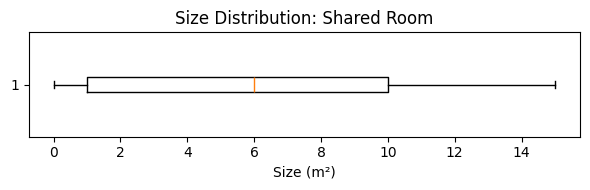

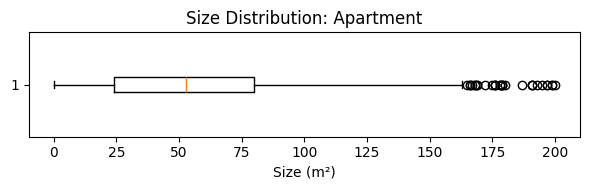

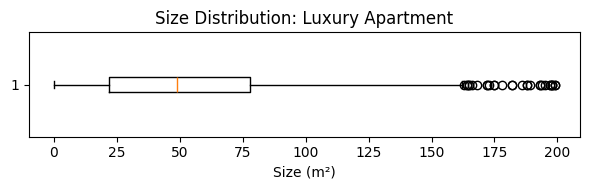

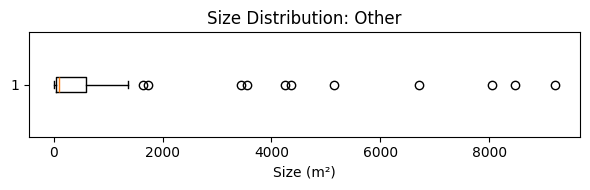

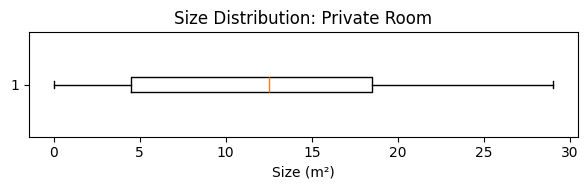

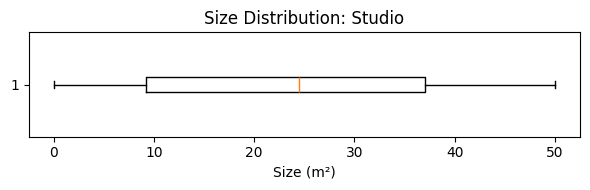

In [52]:
for cat in df['category'].unique():
    subset = df[df['category'] == cat]['total_size'].dropna()
    
    plt.figure(figsize=(6,2))
    plt.boxplot(subset, vert=False)
    plt.title(f"Size Distribution: {cat}")
    plt.xlabel("Size (m²)")
    plt.tight_layout()
    plt.show()

#### Conclusion
Introducing plausible maximum values clearly helped standardize the dataset. While some outliers remain in the apartment and luxury apartment categories, their presence is expected given the natural variation in these types of listings.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Introducing New Column: Price per m²</p>

In [53]:
df['price_per_sqm'] = (df['price'] / df['total_size']).round(2)

# Inserting It Next to the Price Column
col = df.pop('price_per_sqm')
df.insert(4, 'price_per_sqm', col)

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Final Review and Validation</p>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6730 entries, 7 to 9998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   6730 non-null   string        
 1   category               6730 non-null   object        
 2   created_at             6730 non-null   datetime64[ns]
 3   price                  6730 non-null   float64       
 4   price_per_sqm          2677 non-null   Float64       
 5   total_size             2677 non-null   Int64         
 6   furnished              4326 non-null   boolean       
 7   registration_possible  3605 non-null   boolean       
 8   washing_machine        4284 non-null   boolean       
 9   tv                     4222 non-null   boolean       
 10  balcony                1806 non-null   string        
 11  garden                 4243 non-null   string        
 12  terrace                1758 non-null   string        
dtypes: Float

In [55]:
df.sample(10)

,city,category,created_at,price,price_per_sqm,total_size,furnished,registration_possible,washing_machine,tv,balcony,garden,terrace
1460,Marihelle,Apartment,2013-08-21 02:12:34,887.51,<NA>,<NA>,True,<NA>,True,False,<NA>,yes,<NA>
1002,Lie,Private Room,2016-02-22 20:05:46,342.35,<NA>,<NA>,True,False,False,<NA>,<NA>,no,<NA>
2793,Tangen,Luxury Apartment,2013-01-17 21:49:04,4537.70,<NA>,<NA>,True,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7539,Gulbrandsen,Private Room,2017-02-19 09:50:51,333.30,15.15,22,False,True,True,False,<NA>,<NA>,no
3845,Maritås,Luxury Apartment,2013-05-30 19:28:43,3465.35,<NA>,<NA>,<NA>,False,False,False,<NA>,no,<NA>
5504,Karineid,Shared Room,2016-10-11 05:12:41,239.25,<NA>,<NA>,True,False,<NA>,<NA>,<NA>,no,<NA>
6031,Jensen,Luxury Apartment,2017-08-12 12:47:01,6597.74,<NA>,<NA>,<NA>,True,False,True,<NA>,yes,<NA>
5865,Markushelle,Luxury Apartment,2014-11-10 16:21:27,3807.37,<NA>,<NA>,False,<NA>,False,<NA>,<NA>,no,yes
9126,Haugen,Apartment,2017-01-24 12:26:13,835.32,9.39,89,True,<NA>,<NA>,True,<NA>,<NA>,<NA>
1045,Haugen,Apartment,2015-03-31 13:38:33,977.44,<NA>,<NA>,True,<NA>,True,True,<NA>,no,yes


In [56]:
df.shape

(6730, 13)

####
#### Final Summary:

The dataset underwent a thorough cleaning process to address issues related to missing values, inconsistent data types, formatting irregularities, and outliers. Categories were standardized using price-based thresholds, and room sizes were adjusted using plausible value ranges to improve data quality and reliability.

In total, less than 7% of the dataset was dropped due to irreparable errors or inconsistencies, ensuring that the vast majority of listings were retained for further analysis. The final dataset is now well-structured, consistent, and ready for deeper exploration and visualization.

<p style='background-color: #253d7a; margin-top:20px; padding:5px 15px; font-weight: 500; color: white;'>Saving Data for Future Use</p>

In [57]:
df.to_csv('artificial_data_clean.csv', index=False)